## LV 2.

배달

https://school.programmers.co.kr/learn/courses/30/lessons/12978

**문제 설명**

    N개의 마을로 이루어진 나라가 있습니다. 이 나라의 각 마을에는 1부터 N까지의 번호가 각각 하나씩 부여되어 있습니다. 각 마을은 양방향으로 통행할 수 있는 도로로 연결되어 있는데, 서로 다른 마을 간에 이동할 때는 이 도로를 지나야 합니다. 도로를 지날 때 걸리는 시간은 도로별로 다릅니다. 현재 1번 마을에 있는 음식점에서 각 마을로 음식 배달을 하려고 합니다. 각 마을로부터 음식 주문을 받으려고 하는데, N개의 마을 중에서 K 시간 이하로 배달이 가능한 마을에서만 주문을 받으려고 합니다. 다음은 N = 5, K = 3인 경우의 예시입니다.

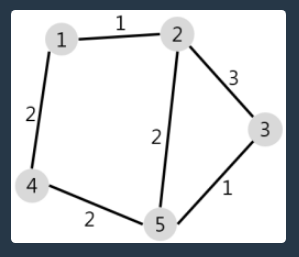

    위 그림에서 1번 마을에 있는 음식점은 [1, 2, 4, 5] 번 마을까지는 3 이하의 시간에 배달할 수 있습니다. 그러나 3번 마을까지는 3시간 이내로 배달할 수 있는 경로가 없으므로 3번 마을에서는 주문을 받지 않습니다. 따라서 1번 마을에 있는 음식점이 배달 주문을 받을 수 있는 마을은 4개가 됩니다.
    마을의 개수 N, 각 마을을 연결하는 도로의 정보 road, 음식 배달이 가능한 시간 K가 매개변수로 주어질 때, 음식 주문을 받을 수 있는 마을의 개수를 return 하도록 solution 함수를 완성해주세요.
    
**제한사항**

    마을의 개수 N은 1 이상 50 이하의 자연수입니다.
    road의 길이(도로 정보의 개수)는 1 이상 2,000 이하입니다.
    road의 각 원소는 마을을 연결하고 있는 각 도로의 정보를 나타냅니다.
    road는 길이가 3인 배열이며, 순서대로 (a, b, c)를 나타냅니다.
    a, b(1 ≤ a, b ≤ N, a != b)는 도로가 연결하는 두 마을의 번호이며, c(1 ≤ c ≤ 10,000, c는 자연수)는 도로를 지나는데 걸리는 시간입니다.
    두 마을 a, b를 연결하는 도로는 여러 개가 있을 수 있습니다.
    한 도로의 정보가 여러 번 중복해서 주어지지 않습니다.
    K는 음식 배달이 가능한 시간을 나타내며, 1 이상 500,000 이하입니다.
    임의의 두 마을간에 항상 이동 가능한 경로가 존재합니다.
    1번 마을에 있는 음식점이 K 이하의 시간에 배달이 가능한 마을의 개수를 return 하면 됩니다.
    
**입출력 예**

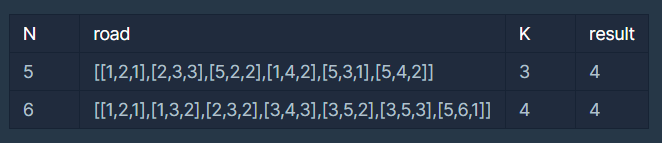

**입출력 예 설명**

    입출력 예 #1
    문제의 예시와 같습니다.

    입출력 예 #2
    주어진 마을과 도로의 모양은 아래 그림과 같습니다.
    
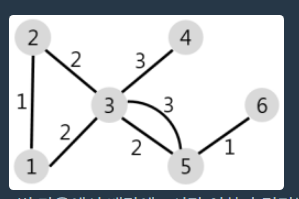

    1번 마을에서 배달에 4시간 이하가 걸리는 마을은 [1, 2, 3, 5] 4개이므로 4를 return 합니다.

In [15]:
def solution(N, road, K):
    answer = 0

    graph = [[int(1e9) for _ in range(N+1)] for _ in range(N+1)]

    for i in range(1, N+1):
        graph[i][i] = 0

    for i,j,c in road:
        graph[i][j] = min(graph[i][j], c)
        graph[j][i] = min(graph[j][i], c)

    # 플로이드 워셜 알고리즘

    for k in range(1, N+1):
        for i in range(1, N+1):
            for j in range(1, N+1):
                graph[i][j] = min(graph[i][j], graph[i][k] + graph[k][j])

    ans = [x for x in graph[1] if x <=K]
    
    return len(ans)

In [17]:
print(solution(5, [[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]], 3))
print(solution(6, [[1,2,1],[1,3,2],[2,3,2],[3,4,3],[3,5,2],[3,5,3],[5,6,1]], 4))

4
4


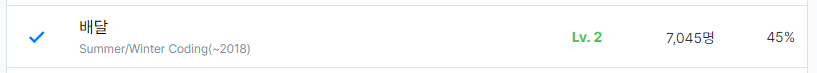

In [11]:
N, road, K = 5, [[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]], 3

graph = [[int(1e9) for _ in range(N+1)] for _ in range(N+1)]

for i in range(1, N+1):
    graph[i][i] = 0

for i,j,c in road:
    graph[i][j] = min(graph[i][j], c)
    graph[j][i] = min(graph[j][i], c)

# 플로이드 워셜 알고리즘

for k in range(1, N+1):
    for i in range(1, N+1):
        for j in range(1, N+1):
            graph[i][j] = min(graph[i][j], graph[i][k] + graph[k][j])
            
ans = [x for x in graph[1] if x <=K]
len(ans)

4

    - 다익스트라(Dijkstra Alogithm) 알고리즘
    
    Dynamic Promgramming을 활용한 최단 경로 탐색 알고리즘
    
    

In [13]:
import heapq

def dijkstra(dist, adj):
    heap = []
    heapq.heappush(heap, [0,1])
    while heap:
        cost, node = heapq.heappop(heap)
        for c, n in adj[node]:
            if cost+c < dist[n]:
                dis[n] = cost+c
                heapq.heappush(heap, [cost+c,n])
    
def solution(N, road, K):
    dis = [float('inf')]*(N+1)
    dist[1] = 0
    adj = [[] for _ in range(N+1)]
    for r in road:
        adj[r[0]].append([r[2],r[1]])
        adj[r[1]].append([r[2],r[0]])
    dijkstra(dis,adj)
    return len([i for i in dist if i <=K])

In [18]:
print(solution(5, [[1,2,1],[2,3,3],[5,2,2],[1,4,2],[5,3,1],[5,4,2]], 3))
print(solution(6, [[1,2,1],[1,3,2],[2,3,2],[3,4,3],[3,5,2],[3,5,3],[5,6,1]], 4))

4
4


     sys에서 matrix를 이용한 푸링
     
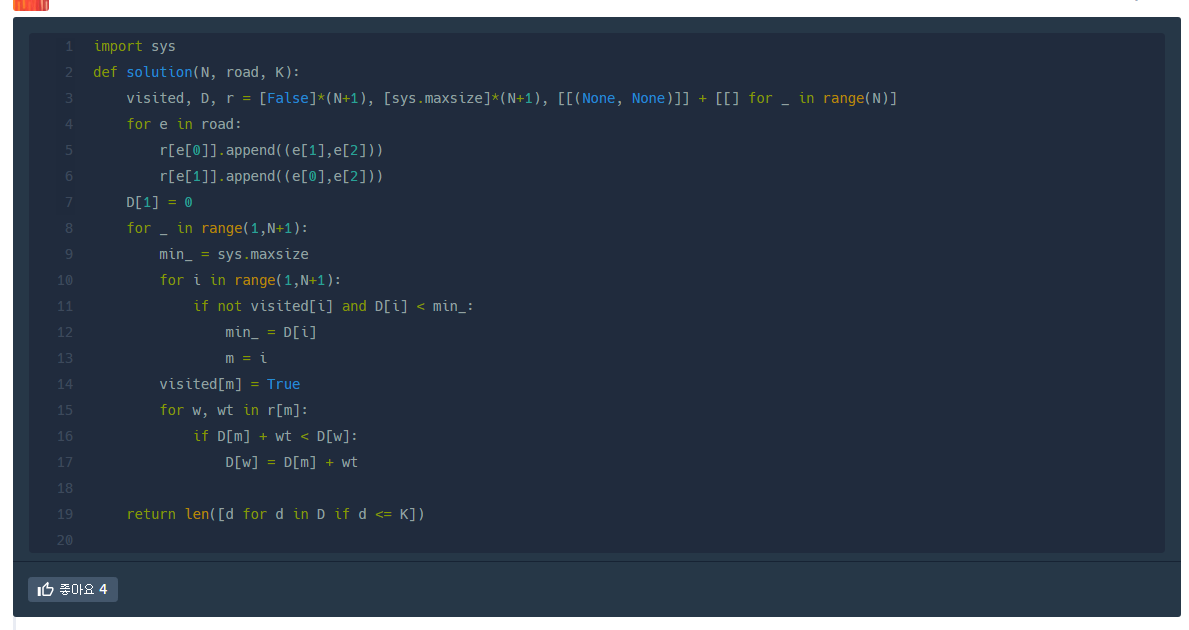     